# Teaching Mathematics with Jupyter and PreText

### Virgil U Pierce, University of Northern Colorado

## Abstract

For a mathematics course that is built heavily around the use of Jupyter as an in-class tool,  such as a Data Science,Mathematical Modeling, or even Linear Algebra or Calculus courses it makes sense to use Jupyter to compose the coursenotes. The prose surrounding the computations depends on the results of the computation for example, or the figures beingproduced are dependent on choices made in the computations.  Jupyter can even be used as an interactive presentationduring these classes.The resulting notebook files can be easily published via Github or similar services, or exported to PDF or HTML.However, these are unsatisfactory ways of sharing the material for some uses, and one might prefer to bundle the notesinto something more like an online textbook.  In this presentation we will give an overview of the use of Jupyter as anin-class tool in these kinds of mathematics courses, and then discuss a conversion script for turning Jupyter notebooksinto PreTeXt XML files for publishing as an online textbook (nicely formatted for mobile devices).


## What is Jupyter

*Jupyter* is primarily an interactive shell for Python with some additional functionality, mainly a *markdown* language syntax for cells that allows one to wrap Python code cells with descriptive text with some formating options. *Markdown* is a What You See Is What You Get (WYSIWYG) language for typsetting similar to the language used by Wikipedia. For our purposes, the most important feature is that it includes escape environments for typesetting mathematical expressions in $\LaTeX$ in line and as equations:

$$ \int x^2 dx = 2 x + C $$




- There are commands for bullets and numeration;
- **Bold**, *Italics*, and ~Strikeout~
- [html tags](https://virgilpierce.github.io/frontmatter-1.html)
- Section and subsection headings (see above)
- Importing images (using an HTML / XML type of syntax)

<img src="IMG_4020.jpg" style="width:200px">

- Of course you can also generate images using Python

- A quote environment (see below)

and probably some other options I have not discovered yet.

Jupyter functions as a webserver either on your local machine or running through a cloud service called a Jupyter Hub. More about Jupyter Hubs at the end.



### What is Python?

From the Python Foundation's website:

> Python is an interpreted, object-oriented, high-level programming language with dynamic semantics. Its high-level built in data  structures, combined with dynamic typing and dynamic binding, make it very attractive for Rapid Application Development, as well as for use as a scripting or glue language to connect existing components together. 





As someone who is realitvely new to the language I can say that my experience has been:  

1. it is a powerful yet easy to learn language with far fewer things that need to be front loaded compared to C++ (no declarations), 
2. it is much easier to read Python code than other languages (in fact this is a primary focus of the design decisions),
3. the interactive environment (like we are using in Jupyter) makes it behave like matlab (you can run a command and then see what happens), 
4. it was written by a mathematician, and is used extensively for computations in math and science,
5. its plotting functions use the same syntax as matlab: plot( x, y, 'b-' )
6. it is free and open (beer and liberty)

Downsides, as a programing language are the obvious

1. Because it is not a compiled language like C++ it is substantially slower,
2. Because it is more of a programing language than matlab, you may need to worry about the structure of variables and what they represent at some point.

I assert, and will try to show you here, that we can insulate students from the issues that occur with downside 2. Downside 1 should not be an issue in most of the cases I have in mind for a class. In my work, 1 has only been an issue in some combinatorial problems where I am trying to iterate over all permutations of size $n > 12$.



I have had students who have run into problems on their personal machines with computations taking too long in a data science class. I think the university Jupyter Hub I will use next time I teach that class will solve this problem.

### Why use a tool like Jupyter/Python in Teaching Mathematics

A major frustration in my teaching has been when I ask students to use a tool that I know is unrelated to what they would use in the 'real-world', in their careers, or in other classes. 

- **Python has evolved to be a major tool used in STEM, from small minor tasks to major research projects**. 
- **Jupyter/Python is a very common tool for Data Science and Mathematics in industry and were identified as important for candidates to have experience with at employee forums run by TPSE and the MAA that I have attended.**



I also find that programming languages do have some things in common with human languages, and one of those commonalities is that if you do not use it, you will lose it. 

- **Asking students to use and interact with Python outside of a their programming class will improve their understanding of the language**
- **Asking students to use and interact with Python in more mathematics classes will expand their problem solving approaches.**

A goal at UNC is to have Python be included in courses throughout the Applied Mathematics degree to increase students fluency and ability to apply computational tools to a wide variety of mathematical and visualization problems.

But its not just for students who have had a Python class, it is possible to design your course materials to function as a gentle introduction to the language, similarly to how matlab or mathematica can be introduced to students:

- **The language is human readable**
- **With Jupyter, the code that students see can be wrapped in detailed explanations**
- **With Jupyter, hyperlinks to even more details can be added**
- **I will show you some techniques for 'locking' cells to limit what students can change in a notebook, allowing you to create worksheets and interactive notebooks that will be hard(er) for students to 'break'**



### Using Jupyter/Python for Teaching Mathematics

I will show you a few things we can do with Jupyter/Python that I think are useful for mathematics classes. A caveat is that I have only so far used it for teaching Data Science. I have taught Linear Algebra using Matlab a number of times and plan to use Python the next time I teach it. I have not taught Calculus using a toold like Python but others have and I think it would be particularly useful in that class to have students use it to produce graphs (as you might use Matlab or Mathematica). For STEM students at UNC this would be particularly helpful as they frequently take a first course on Python in proximity to Calculus.

#### Data Science with Pandas and Scikitlearn

Starting with the best example first. 

- Pandas is a package for working with datasets: reading them from files, manipulating the data, and prepping it for analysis. 
- Scikitlearn is a package for modeling from data and developing predictions. It includes basics such as Linear Regression, and advanced models such as Neural Networks. It also includes tools for evaluating models.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
ab = pd.read_csv('Abalone/abalone.csv', 
                 names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight',
                                          'Rings'])

ab.head()

,Sex,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [22]:
# Produce a numpy array with the Length variable and another with the Whole_Weight

X = np.atleast_2d(np.array([float(h) for h in ab.loc[:, 'Length']])).transpose()

y = np.array(ab.loc[:, 'Whole_weight'])

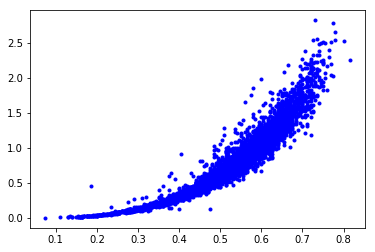

In [23]:
plt.plot(X, y, 'b.');

In [24]:
X2 = np.atleast_2d(np.array([x**2 for x in X]))
X = np.concatenate([X, X2], axis=1)
print(X[:10])

[[0.455    0.207025]
 [0.35     0.1225  ]
 [0.53     0.2809  ]
 [0.44     0.1936  ]
 [0.33     0.1089  ]
 [0.425    0.180625]
 [0.53     0.2809  ]
 [0.545    0.297025]
 [0.475    0.225625]
 [0.55     0.3025  ]]


A side note here is that students in Linear Algebra that are heading towards a Data Science course will benifit from experience working with large non-square matrices. Typical problems either have many more samples than features, or in the case of images many more features than samples.

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
c, b, a = reg.intercept_, *reg.coef_
c, b, a

(0.44493874474588524, -3.2701559859542164, 7.257566596811777)

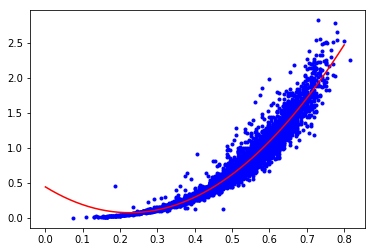

In [29]:
# Plotting the resulting Quadratic Regression Model

plt.plot(X[:, 0], y, 'b.')
xx = np.linspace(0, 0.8, 50)
yy = a*xx**2 + b*xx + c
plt.plot(xx, yy, 'r-');

#### Linear Algebra



#### Calculus



#### Additional Tools:  Cell Lock



#### Additional Tools: Jupyter Hub and Github




## Converting Jupyter to PreText



### Why convert Jupyter to PreText



#### Distributing Jupyter Notebooks by Github



#### Compiling Notebooks to a PreText Book